In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows=None

In [150]:
df_copy = pd.read_excel('DLL_full_dataset.xlsx')
df_all=df_copy.copy()
df_all.head()

,personal_credit_%,age,A30-60_Counter,expense_ratio,income,num_loans,A90+_Counter,num_home_loans,A60-90_Counter,num_dependents,PD_2years
0,0.000000,29,0,0.011513,4342.0,5,0,0,0,0.0,0
1,0.595526,55,0,0.835333,1833.0,11,0,1,0,0.0,0
2,0.000000,43,0,0.043437,4166.0,2,0,0,0,4.0,0
3,0.391980,40,0,0.059771,9000.0,2,0,0,0,5.0,0
4,0.000000,35,0,0.133598,5800.0,12,0,1,0,0.0,0


In [151]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   personal_credit_%  150000 non-null  float64
 1   age                150000 non-null  int64  
 2   A30-60_Counter     150000 non-null  int64  
 3   expense_ratio      150000 non-null  float64
 4   income             120269 non-null  float64
 5   num_loans          150000 non-null  int64  
 6   A90+_Counter       150000 non-null  int64  
 7   num_home_loans     150000 non-null  int64  
 8   A60-90_Counter     150000 non-null  int64  
 9   num_dependents     146076 non-null  float64
 10  PD_2years          150000 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [152]:
pd.options.display.max_rows = None
df_all.isnull().sum()

personal_credit_%        0
age                      0
A30-60_Counter           0
expense_ratio            0
income               29731
num_loans                0
A90+_Counter             0
num_home_loans           0
A60-90_Counter           0
num_dependents        3924
PD_2years                0
dtype: int64

In [153]:
df_all['income'].fillna(df_all['income'].mean(), inplace=True)
df_all['num_dependents'].fillna(df_all['num_dependents'].mean(), inplace=True)
df_all.isnull().sum()

personal_credit_%    0
age                  0
A30-60_Counter       0
expense_ratio        0
income               0
num_loans            0
A90+_Counter         0
num_home_loans       0
A60-90_Counter       0
num_dependents       0
PD_2years            0
dtype: int64

In [154]:
df_all['PD_2years'].value_counts(dropna = False)

0    139974
1     10026
Name: PD_2years, dtype: int64

In [155]:
df_all['PD_2years'].value_counts()/df_all['PD_2years'].count()

0    0.93316
1    0.06684
Name: PD_2years, dtype: float64

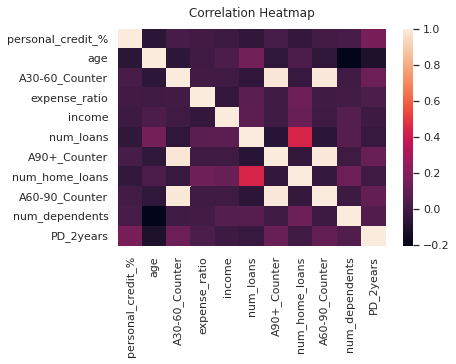

In [156]:
corr_matrix_ = df_all.corr()
# corr_matrix.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps
heatmap = sns.heatmap(corr_matrix_, 
        xticklabels=corr_matrix_.columns,
        yticklabels=corr_matrix_.columns)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [157]:
corr_matrix_.style.background_gradient(cmap='coolwarm')

,personal_credit_%,age,A30-60_Counter,expense_ratio,income,num_loans,A90+_Counter,num_home_loans,A60-90_Counter,num_dependents,PD_2years
personal_credit_%,1.000000,-0.074769,0.019020,0.002229,-0.011880,-0.052331,0.014107,-0.043781,0.007232,0.020680,0.164569
age,-0.074769,1.000000,-0.062995,-0.005919,0.032984,0.147705,-0.061005,0.033150,-0.057159,-0.208102,-0.115386
A30-60_Counter,0.019020,-0.062995,1.000000,-0.000453,-0.007636,-0.055312,0.983603,-0.030565,0.987005,-0.002525,0.125587
expense_ratio,0.002229,-0.005919,-0.000453,1.000000,-0.043537,0.077237,-0.005562,0.133507,-0.005031,0.007790,0.031772
income,-0.011880,0.032984,-0.007636,-0.043537,1.000000,0.082319,-0.009484,0.113823,-0.008259,0.058542,-0.018002
num_loans,-0.052331,0.147705,-0.055312,0.077237,0.082319,1.000000,-0.079984,0.433959,-0.071077,0.064507,-0.029669
A90+_Counter,0.014107,-0.061005,0.983603,-0.005562,-0.009484,-0.079984,1.000000,-0.045205,0.992796,-0.009579,0.117175
num_home_loans,-0.043781,0.033150,-0.030565,0.133507,0.113823,0.433959,-0.045205,1.000000,-0.039722,0.123370,-0.007038
A60-90_Counter,0.007232,-0.057159,0.987005,-0.005031,-0.008259,-0.071077,0.992796,-0.039722,1.000000,-0.010277,0.102261
num_dependents,0.020680,-0.208102,-0.002525,0.007790,0.058542,0.064507,-0.009579,0.123370,-0.010277,1.000000,0.045621


### Preprocessing few discrete variables

In [158]:
# df_train_dummies = [pd.get_dummies(df_all['age'], prefix = 'age', prefix_sep = ':'),
#                      pd.get_dummies(df_all['A30-60_Counter'], prefix = 'A30-60_Counter', prefix_sep = ':'),
#                      pd.get_dummies(df_all['num_loans'], prefix = 'num_loans', prefix_sep = ':'),
#                      pd.get_dummies(df_all['A90+_Counter'], prefix = 'A90+_Counter', prefix_sep = ':'),
#                      pd.get_dummies(df_all['num_home_loans'], prefix = 'num_home_loans', prefix_sep = ':'),
#                      pd.get_dummies(df_all['A60-90_Counter'], prefix = 'A60-90_Counter', prefix_sep = ':'),
#                      pd.get_dummies(df_all['num_dependents'], prefix = 'num_dependents', prefix_sep = ':'),]
               

In [159]:
# type(df_train_dummies)

In [160]:
# df_train_dummies = pd.concat(df_train_dummies, axis = 1)
# type(df_train_dummies)

In [161]:
# df_all = pd.concat([df_all, df_train_dummies], axis = 1)
# df_all.columns.values

### Data preprocessing / fine classing and course classing


In [162]:
df_inputs_prepr = df_all.drop('PD_2years', axis = 1)
df_targets_prepr = df_all['PD_2years']

In [163]:
df_1 = pd.concat([df_inputs_prepr['age'], df_targets_prepr], axis = 1)

df_1.head()

,age,PD_2years
0,29,0
1,55,0
2,43,0
3,40,0
4,35,0


In [164]:
# df_1.groupby(df_1.columns.values[0], as_index = False)[df_1.columns.values[1]].count()

In [165]:
df_1 = pd.concat([df_1.groupby(df_1.columns.values[0], as_index = False)[df_1.columns.values[1]].count(),
                df_1.groupby(df_1.columns.values[0], as_index = False)[df_1.columns.values[1]].mean()], axis = 1)

In [166]:
df_1.head()

,age,PD_2years,age,PD_2years
0,0,1,0,0.000000
1,21,183,21,0.071038
2,22,434,22,0.082949
3,23,641,23,0.109204
4,24,816,24,0.120098


In [167]:
df_1 = df_1.iloc[:, [0, 1, 3]]

In [168]:
df_1.columns = [df_1.columns.values[0], 'n_obs', 'prop_good']

In [169]:
df_1.head()

,age,n_obs,prop_good
0,0,1,0.000000
1,21,183,0.071038
2,22,434,0.082949
3,23,641,0.109204
4,24,816,0.120098


In [170]:
df_1['prop_n_obs'] = df_1['n_obs'] / df_1['n_obs'].sum()
df_1.head()

,age,n_obs,prop_good,prop_n_obs
0,0,1,0.000000,0.000007
1,21,183,0.071038,0.001220
2,22,434,0.082949,0.002893
3,23,641,0.109204,0.004273
4,24,816,0.120098,0.005440


In [171]:
df_1['n_good'] = df_1['prop_good'] * df_1['n_obs']
df_1['n_bad'] = (1 - df_1['prop_good']) * df_1['n_obs']
df_1.head()

,age,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,0,1,0.000000,0.000007,0.0,1.0
1,21,183,0.071038,0.001220,13.0,170.0
2,22,434,0.082949,0.002893,36.0,398.0
3,23,641,0.109204,0.004273,70.0,571.0
4,24,816,0.120098,0.005440,98.0,718.0


In [172]:
df_1['prop_n_good'] = df_1['n_good'] / df_1['n_good'].sum()
df_1['prop_n_bad'] = df_1['n_bad'] / df_1['n_bad'].sum()
df_1.head()

,age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,0,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007
1,21,183,0.071038,0.001220,13.0,170.0,0.001297,0.001215
2,22,434,0.082949,0.002893,36.0,398.0,0.003591,0.002843
3,23,641,0.109204,0.004273,70.0,571.0,0.006982,0.004079
4,24,816,0.120098,0.005440,98.0,718.0,0.009775,0.005130


In [173]:
df_1['WoE'] = np.log(df_1['prop_n_good'] / df_1['prop_n_bad'])
df_1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,0,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007,-inf
1,21,183,0.071038,0.001220,13.0,170.0,0.001297,0.001215,0.065426
2,22,434,0.082949,0.002893,36.0,398.0,0.003591,0.002843,0.233342
3,23,641,0.109204,0.004273,70.0,571.0,0.006982,0.004079,0.537381
4,24,816,0.120098,0.005440,98.0,718.0,0.009775,0.005130,0.644773


In [174]:
df_1 = df_1.sort_values(['WoE'])
df_1 = df_1.reset_index(drop = True)
df_1

,age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,0,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007,-inf
1,105,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007,-inf
2,103,3,0.000000,0.000020,0.0,3.0,0.000000,0.000021,-inf
3,102,3,0.000000,0.000020,0.0,3.0,0.000000,0.000021,-inf
4,98,6,0.000000,0.000040,0.0,6.0,0.000000,0.000043,-inf
5,97,17,0.000000,0.000113,0.0,17.0,0.000000,0.000121,-inf
6,96,18,0.000000,0.000120,0.0,18.0,0.000000,0.000129,-inf
7,92,93,0.000000,0.000620,0.0,93.0,0.000000,0.000664,-inf
8,107,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007,-inf
9,109,2,0.000000,0.000013,0.0,2.0,0.000000,0.000014,-inf


In [175]:
df_1['diff_prop_good'] = df_1['prop_good'].diff().abs()
df_1['diff_WoE'] = df_1['WoE'].diff().abs()
df_1

,age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,0,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007,-inf,NaN,NaN
1,105,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007,-inf,0.000000,NaN
2,103,3,0.000000,0.000020,0.0,3.0,0.000000,0.000021,-inf,0.000000,NaN
3,102,3,0.000000,0.000020,0.0,3.0,0.000000,0.000021,-inf,0.000000,NaN
4,98,6,0.000000,0.000040,0.0,6.0,0.000000,0.000043,-inf,0.000000,NaN
5,97,17,0.000000,0.000113,0.0,17.0,0.000000,0.000121,-inf,0.000000,NaN
6,96,18,0.000000,0.000120,0.0,18.0,0.000000,0.000129,-inf,0.000000,NaN
7,92,93,0.000000,0.000620,0.0,93.0,0.000000,0.000664,-inf,0.000000,NaN
8,107,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007,-inf,0.000000,NaN
9,109,2,0.000000,0.000013,0.0,2.0,0.000000,0.000014,-inf,0.000000,NaN


In [176]:
df_1['IV'] = (df_1['prop_n_good'] - df_1['prop_n_bad']) * df_1['WoE']
df_1['IV'] = df_1['IV'].sum()
df_1

,age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007,-inf,NaN,NaN,inf
1,105,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007,-inf,0.000000,NaN,inf
2,103,3,0.000000,0.000020,0.0,3.0,0.000000,0.000021,-inf,0.000000,NaN,inf
3,102,3,0.000000,0.000020,0.0,3.0,0.000000,0.000021,-inf,0.000000,NaN,inf
4,98,6,0.000000,0.000040,0.0,6.0,0.000000,0.000043,-inf,0.000000,NaN,inf
5,97,17,0.000000,0.000113,0.0,17.0,0.000000,0.000121,-inf,0.000000,NaN,inf
6,96,18,0.000000,0.000120,0.0,18.0,0.000000,0.000129,-inf,0.000000,NaN,inf
7,92,93,0.000000,0.000620,0.0,93.0,0.000000,0.000664,-inf,0.000000,NaN,inf
8,107,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007,-inf,0.000000,NaN,inf
9,109,2,0.000000,0.000013,0.0,2.0,0.000000,0.000014,-inf,0.000000,NaN,inf


In [177]:
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [178]:
def woe_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    # df = df.sort_values(['WoE'])
    # df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

###***Variable AGE***

In [180]:
df_temp = woe_discrete(df_inputs_prepr, 'age', df_targets_prepr)
df_temp_2 = woe_continuous(df_inputs_prepr, 'age', df_targets_prepr)
df_temp_2

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007,-inf,NaN,NaN,inf
1,21,183,0.071038,0.001220,13.0,170.0,0.001297,0.001215,0.065426,0.071038,inf,inf
2,22,434,0.082949,0.002893,36.0,398.0,0.003591,0.002843,0.233342,0.011911,0.167916,inf
3,23,641,0.109204,0.004273,70.0,571.0,0.006982,0.004079,0.537381,0.026255,0.304039,inf
4,24,816,0.120098,0.005440,98.0,718.0,0.009775,0.005130,0.644773,0.010894,0.107392,inf
5,25,953,0.126967,0.006353,121.0,832.0,0.012069,0.005944,0.708233,0.006869,0.063460,inf
6,26,1193,0.123219,0.007953,147.0,1046.0,0.014662,0.007473,0.673979,0.003749,0.034254,inf
7,27,1338,0.124066,0.008920,166.0,1172.0,0.016557,0.008373,0.681796,0.000847,0.007817,inf
8,28,1560,0.131410,0.010400,205.0,1355.0,0.020447,0.009680,0.747728,0.007344,0.065932,inf
9,29,1702,0.105170,0.011347,179.0,1523.0,0.017854,0.010881,0.495223,0.026240,0.252505,inf


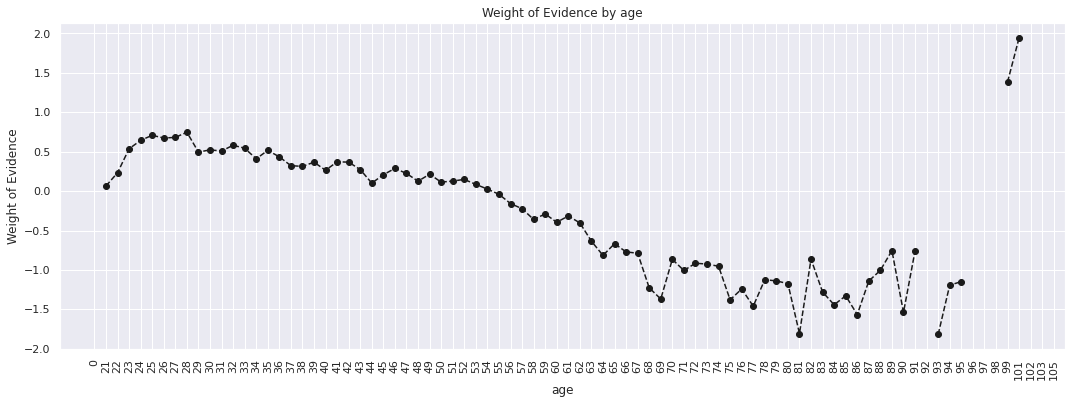

In [181]:
plot_by_woe(df_temp_2,90)

In [182]:
df_inputs_prepr['age:21-54'] = np.where(df_inputs_prepr['age'].isin(range(21,54)), 1, 0)
df_inputs_prepr['age:55-67'] = np.where(df_inputs_prepr['age'].isin(range(55,67)), 1, 0)
df_inputs_prepr['age:68-94'] = np.where(df_inputs_prepr['age'].isin(range(68,94)), 1, 0)


### ***Variable : num_loans***

In [183]:
df_temp = woe_discrete(df_inputs_prepr, 'num_loans', df_targets_prepr)
df_temp_2 = woe_continuous(df_inputs_prepr, 'num_loans', df_targets_prepr)
df_temp_2

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,num_loans,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,1888,0.256356,0.012587,484.0,1404.0,0.048274,0.010030,1.571279,NaN,NaN,inf
1,1,4438,0.131816,0.029587,585.0,3853.0,0.058348,0.027527,0.751279,0.124540,0.820000,inf
2,2,6666,0.091359,0.044440,609.0,6057.0,0.060742,0.043272,0.339123,0.040457,0.412156,inf
3,3,9058,0.075293,0.060387,682.0,8376.0,0.068023,0.059840,0.128179,0.016067,0.210944,inf
4,4,11609,0.064002,0.077393,743.0,10866.0,0.074107,0.077629,-0.046423,0.011290,0.174602,inf
5,5,12931,0.063336,0.086207,819.0,12112.0,0.081688,0.086530,-0.057593,0.000666,0.011170,inf
6,6,13614,0.055384,0.090760,754.0,12860.0,0.075204,0.091874,-0.200210,0.007952,0.142617,inf
7,7,13245,0.056399,0.088300,747.0,12498.0,0.074506,0.089288,-0.180984,0.001014,0.019226,inf
8,8,12562,0.048241,0.083747,606.0,11956.0,0.060443,0.085416,-0.345834,0.008158,0.164850,inf
9,9,11355,0.058476,0.075700,664.0,10691.0,0.066228,0.076378,-0.142600,0.010236,0.203233,inf


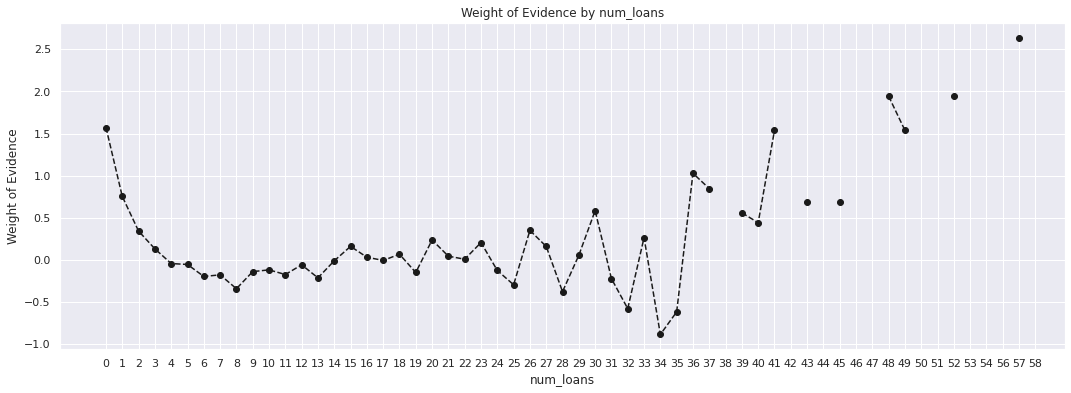

In [184]:
plot_by_woe(df_temp_2)

In [185]:
df_inputs_prepr['num_loans'] = df_inputs_prepr['num_loans'].astype(int)

In [186]:
df_inputs_prepr['num_loans:0'] = np.where(df_inputs_prepr['num_loans'].isin([0]), 1, 0)
df_inputs_prepr['num_loans:1'] = np.where(df_inputs_prepr['num_loans'].isin([1]), 1, 0)
df_inputs_prepr['num_loans:2'] = np.where(df_inputs_prepr['num_loans'].isin([2]), 1, 0)
df_inputs_prepr['num_loans:3'] = np.where(df_inputs_prepr['num_loans'].isin([3]), 1, 0)
df_inputs_prepr['num_loans:4-7'] = np.where(df_inputs_prepr['num_loans'].isin(range(4,8)), 1, 0)
df_inputs_prepr['num_loans:8'] = np.where(df_inputs_prepr['num_loans'].isin([8]), 1, 0)
df_inputs_prepr['num_loans:9-13'] = np.where(df_inputs_prepr['num_loans'].isin(range(9,14)), 1, 0)
df_inputs_prepr['num_loans:14-25'] = np.where(df_inputs_prepr['num_loans'].isin(range(14,25)), 1, 0)
df_inputs_prepr['num_loans:25'] = np.where(df_inputs_prepr['num_loans'].isin([26]), 1, 0)
df_inputs_prepr['num_loans:26-27'] = np.where(df_inputs_prepr['num_loans'].isin(range(26,28)), 1, 0)
df_inputs_prepr['num_loans:28-58'] = np.where(df_inputs_prepr['num_loans'].isin(range(28,59)), 1, 0)


### Variable A30-60_Counter

In [187]:
df_temp = woe_discrete(df_inputs_prepr, 'A30-60_Counter', df_targets_prepr)
df_temp_2 = woe_continuous(df_inputs_prepr, 'A30-60_Counter', df_targets_prepr)
df_temp

,A30-60_Counter,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,126018,0.040002,0.840120,5041.0,120977.0,0.502793,0.864282,-0.541721,NaN,NaN,inf
1,1,16033,0.150253,0.106887,2409.0,13624.0,0.240275,0.097332,0.903654,0.110250,1.445375,inf
2,2,4598,0.265115,0.030653,1219.0,3379.0,0.121584,0.024140,1.616726,0.114863,0.713072,inf
3,8,25,0.320000,0.000167,8.0,17.0,0.000798,0.000121,1.882503,0.054885,0.265777,inf
4,9,12,0.333333,0.000080,4.0,8.0,0.000399,0.000057,1.943128,0.013333,0.060625,inf
5,3,1754,0.352338,0.011693,618.0,1136.0,0.061640,0.008116,2.027495,0.019004,0.084367,inf
6,4,747,0.425703,0.004980,318.0,429.0,0.031718,0.003065,2.336869,0.073365,0.309375,inf
7,5,342,0.450292,0.002280,154.0,188.0,0.015360,0.001343,2.436786,0.024590,0.099916,inf
8,12,2,0.500000,0.000013,1.0,1.0,0.000100,0.000007,2.636275,0.049708,0.199489,inf
9,7,54,0.518519,0.000360,28.0,26.0,0.002793,0.000186,2.710383,0.018519,0.074108,inf


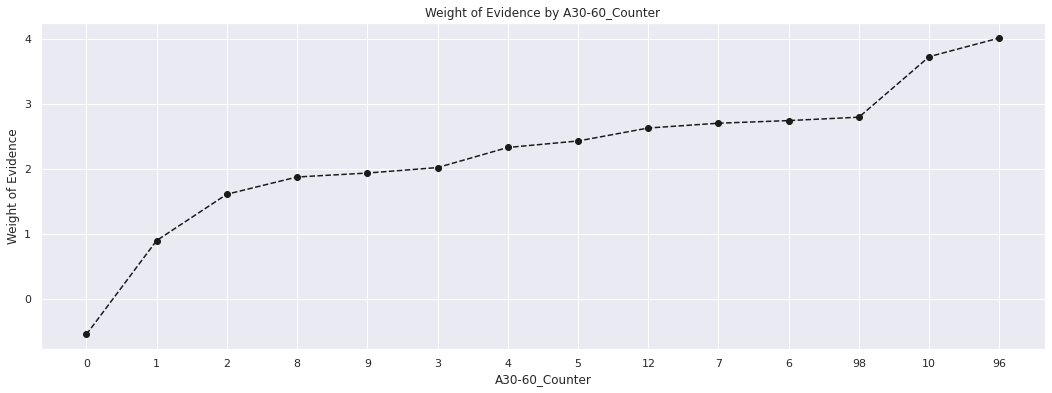

In [188]:
plot_by_woe(df_temp)

In [189]:
df_inputs_prepr['A30-60_Counter:0'] = np.where(df_inputs_prepr['A30-60_Counter']==0, 1, 0)
df_inputs_prepr['A30-60_Counter:1'] = np.where(df_inputs_prepr['A30-60_Counter']==1, 1, 0)
df_inputs_prepr['A30-60_Counter:9,2'] = np.where((df_inputs_prepr['A30-60_Counter']== 9) & (df_inputs_prepr['A30-60_Counter']== 2), 1, 0)
df_inputs_prepr['A30-60_Counter:8,3'] = np.where((df_inputs_prepr['A30-60_Counter']== 8) & (df_inputs_prepr['A30-60_Counter']== 3), 1, 0)
df_inputs_prepr['A30-60_Counter:4,5,7'] = np.where((df_inputs_prepr['A30-60_Counter']== 4) & (df_inputs_prepr['A30-60_Counter']== 5) & (df_inputs_prepr['A30-60_Counter']== 7), 1, 0)
# df_inputs_prepr['A30-60_Counter:12,6,98'] = np.where((df_inputs_prepr['A30-60_Counter']== 12 & (df_inputs_prepr['A30-60_Counter']== 6) & (df_inputs_prepr['A30-60_Counter']== 98), 1, 0)
df_inputs_prepr['A30-60_Counter:12,6,98'] = np.where((df_inputs_prepr['A30-60_Counter']== 12) & (df_inputs_prepr['A30-60_Counter']== 6) & (df_inputs_prepr['A30-60_Counter']== 98), 1, 0)
df_inputs_prepr['A30-60_Counter:10,96'] = np.where((df_inputs_prepr['A30-60_Counter']== 10) & (df_inputs_prepr['A30-60_Counter']== 96), 1, 0)



### Variable Income

In [190]:
df_temp = woe_discrete(df_inputs_prepr, 'income', df_targets_prepr)
df_temp_2 = woe_continuous(df_inputs_prepr, 'income', df_targets_prepr)



/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [191]:
df_temp['income'].mean()

10887.941097553321

In [194]:
# plot_by_woe(df_temp_2,90)

In [195]:
df_inputs_prepr['income>median'] = np.where(df_inputs_prepr['income']>10330, 1, 0)
df_inputs_prepr['income==median'] = np.where(df_inputs_prepr['income']==10330, 1, 0)
df_inputs_prepr['income<median'] = np.where(df_inputs_prepr['income']<10330, 1, 0)

### Variable A90+_Counter

In [196]:
# df_temp = woe_discrete(df_inputs_prepr, 'A90+_Counter', df_targets_prepr)
# df_temp_2 = woe_continuous(df_inputs_prepr, 'A90+_Counter', df_targets_prepr)
# df_temp

In [198]:
# df_inputs_prepr['A90+_Counter:0'] = np.where(df_inputs_prepr['A90+_Counter']==0, 1, 0)
# df_inputs_prepr['A90+_Counter:1'] = np.where(df_inputs_prepr['A90+_Counter']==1, 1, 0)
# df_inputs_prepr['A90+_Counter:14,12,2,98'] = np.where((df_inputs_prepr['A90+_Counter']== 14) & 
#                                                         (df_inputs_prepr['A90+_Counter']== 12) &
#                                                         (df_inputs_prepr['A90+_Counter']== 2) &
#                                                         (df_inputs_prepr['A90+_Counter']== 98) ,
#                                                         1, 0)
# df_inputs_prepr['A90+_Counter:6,3,5'] = np.where((df_inputs_prepr['A90+_Counter']== 6) & 
#                                                         (df_inputs_prepr['A90+_Counter']== 3) &
#                                                         (df_inputs_prepr['A90+_Counter']== 5) ,
#                                                         1, 0)
# df_inputs_prepr['A90+_Counter:4,10,13,8'] = np.where((df_inputs_prepr['A90+_Counter']== 4) & 
#                                                         (df_inputs_prepr['A90+_Counter']== 10) &
#                                                         (df_inputs_prepr['A90+_Counter']== 13) &
#                                                         (df_inputs_prepr['A90+_Counter']== 8) ,
#                                                         1, 0)
# df_inputs_prepr['A90+_Counter:11,9,96,7,17'] = np.where((df_inputs_prepr['A90+_Counter']== 11) & 
#                                                         (df_inputs_prepr['A90+_Counter']== 9) &
#                                                         (df_inputs_prepr['A90+_Counter']==96) &
#                                                         (df_inputs_prepr['A90+_Counter']== 7) &
#                                                          (df_inputs_prepr['A90+_Counter']== 17),
#                                                         1, 0)

### Variable num_home_loans

In [199]:
df_temp = woe_discrete(df_inputs_prepr, 'num_home_loans', df_targets_prepr)
df_temp_2 = woe_continuous(df_inputs_prepr, 'num_home_loans', df_targets_prepr)
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,num_home_loans,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,54,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007,-inf,NaN,NaN,inf
1,26,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007,-inf,0.000000,NaN,inf
2,23,2,0.000000,0.000013,0.0,2.0,0.000000,0.000014,-inf,0.000000,NaN,inf
3,21,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007,-inf,0.000000,NaN,inf
4,19,2,0.000000,0.000013,0.0,2.0,0.000000,0.000014,-inf,0.000000,NaN,inf
5,18,2,0.000000,0.000013,0.0,2.0,0.000000,0.000014,-inf,0.000000,NaN,inf
6,14,7,0.000000,0.000047,0.0,7.0,0.000000,0.000050,-inf,0.000000,NaN,inf
7,32,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007,-inf,0.000000,NaN,inf
8,1,52338,0.052505,0.348920,2748.0,49590.0,0.274087,0.354280,-0.256641,0.052505,inf,inf
9,2,31522,0.055993,0.210147,1765.0,29757.0,0.176042,0.212589,-0.188639,0.003488,6.800212e-02,inf


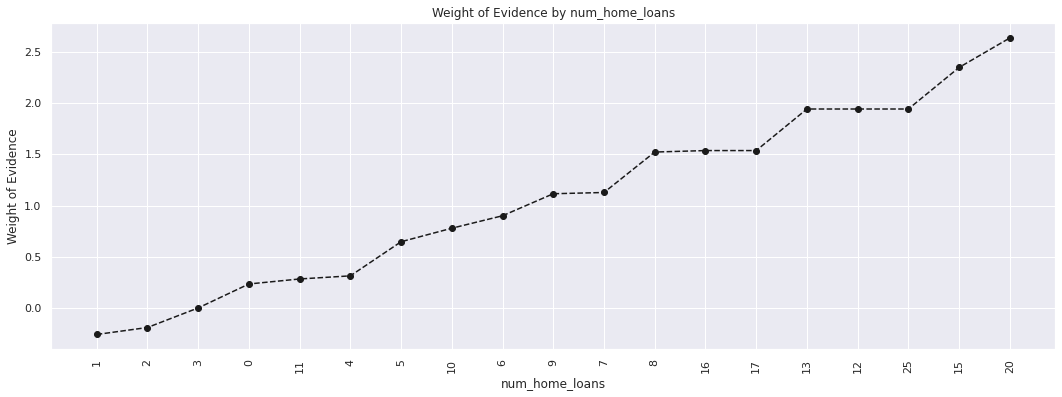

In [200]:
plot_by_woe(df_temp,90)

### Variable A60-90_Counter

In [201]:
df_temp = woe_discrete(df_inputs_prepr, 'A60-90_Counter', df_targets_prepr)
df_temp_2 = woe_continuous(df_inputs_prepr, 'A60-90_Counter', df_targets_prepr)
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,A60-90_Counter,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,9,1,0.000000,0.000007,0.0,1.0,0.000000,0.000007,-inf,NaN,NaN,inf
1,0,142396,0.050956,0.949307,7256.0,135140.0,0.723718,0.965465,-0.288208,0.050956,inf,inf
2,1,5731,0.310068,0.038207,1777.0,3954.0,0.177239,0.028248,1.836474,0.259112,2.124681,inf
3,8,2,0.500000,0.000013,1.0,1.0,0.000100,0.000007,2.636275,0.189932,0.799801,inf
4,2,1118,0.501789,0.007453,561.0,557.0,0.055955,0.003979,2.643431,0.001789,0.007156,inf
5,98,264,0.541667,0.001760,143.0,121.0,0.014263,0.000864,2.803329,0.039878,0.159898,inf
6,7,9,0.555556,0.000060,5.0,4.0,0.000499,0.000029,2.859419,0.013889,0.056089,inf
7,3,318,0.566038,0.002120,180.0,138.0,0.017953,0.000986,2.901978,0.010482,0.042560,inf
8,5,34,0.617647,0.000227,21.0,13.0,0.002095,0.000093,3.115848,0.051609,0.213870,inf
9,4,105,0.619048,0.000700,65.0,40.0,0.006483,0.000286,3.121783,0.001401,0.005935,inf


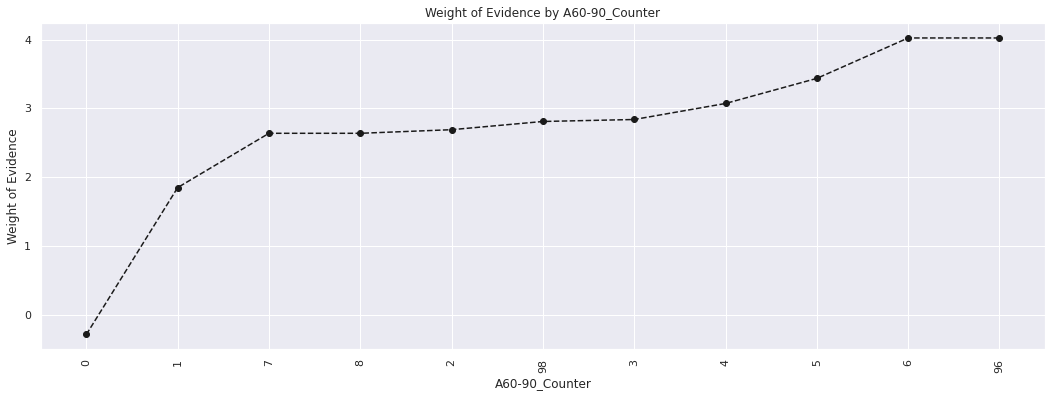

In [69]:
plot_by_woe(df_temp,90)

In [202]:
df_inputs_prepr['A60-90_Counter:0'] = np.where(df_inputs_prepr['A60-90_Counter']==0, 1, 0)
df_inputs_prepr['A60-90_Counter:1'] = np.where(df_inputs_prepr['A60-90_Counter']==1, 1, 0)
df_inputs_prepr['A60-90_Counter:7,8,2,98,3,4'] = np.where((df_inputs_prepr['A60-90_Counter']== 7) & 
                                                        (df_inputs_prepr['A60-90_Counter']== 8) &
                                                        (df_inputs_prepr['A60-90_Counter']== 2) &
                                                        (df_inputs_prepr['A60-90_Counter']== 98)&
                                                        (df_inputs_prepr['A60-90_Counter']== 3),
                                                        1, 0)
df_inputs_prepr['A60-90_Counter:4,5,6,96'] = np.where((df_inputs_prepr['A60-90_Counter']== 4) & 
                                                        (df_inputs_prepr['A60-90_Counter']== 5) &
                                                        (df_inputs_prepr['A60-90_Counter']== 6) &
                                                        (df_inputs_prepr['A60-90_Counter']== 96),                                                       
                                                        1, 0)
df_inputs_prepr['A60-90_Counter:9,11'] = np.where((df_inputs_prepr['A60-90_Counter']== 9) & 
                                                        (df_inputs_prepr['A60-90_Counter']== 11),
                                                          1, 0)  

### Variable num_dependents

In [203]:
df_temp = woe_discrete(df_inputs_prepr, 'num_dependents', df_targets_prepr)
df_temp_2 = woe_continuous(df_inputs_prepr, 'num_dependents', df_targets_prepr)
df_temp_2

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,num_dependents,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.000000,86902,0.058629,0.579347,5095.0,81807.0,0.508179,0.584444,-0.139828,NaN,NaN,inf
1,0.757222,3924,0.045617,0.026160,179.0,3745.0,0.017854,0.026755,-0.404516,0.013013,0.264688,inf
2,1.000000,26316,0.073529,0.175440,1935.0,24381.0,0.192998,0.174182,0.102578,0.027913,0.507094,inf
3,2.000000,19522,0.081139,0.130147,1584.0,17938.0,0.157989,0.128152,0.209307,0.007610,0.106729,inf
4,3.000000,9483,0.088263,0.063220,837.0,8646.0,0.083483,0.061769,0.301247,0.007124,0.091940,inf
5,4.000000,2862,0.103774,0.019080,297.0,2565.0,0.029623,0.018325,0.480293,0.015510,0.179046,inf
6,5.000000,746,0.091153,0.004973,68.0,678.0,0.006782,0.004844,0.336635,0.012621,0.143658,inf
7,6.000000,158,0.151899,0.001053,24.0,134.0,0.002394,0.000957,0.916489,0.060746,0.579854,inf
8,7.000000,51,0.098039,0.000340,5.0,46.0,0.000499,0.000329,0.417071,0.053860,0.499418,inf
9,8.000000,24,0.083333,0.000160,2.0,22.0,0.000199,0.000157,0.238380,0.014706,0.178692,inf


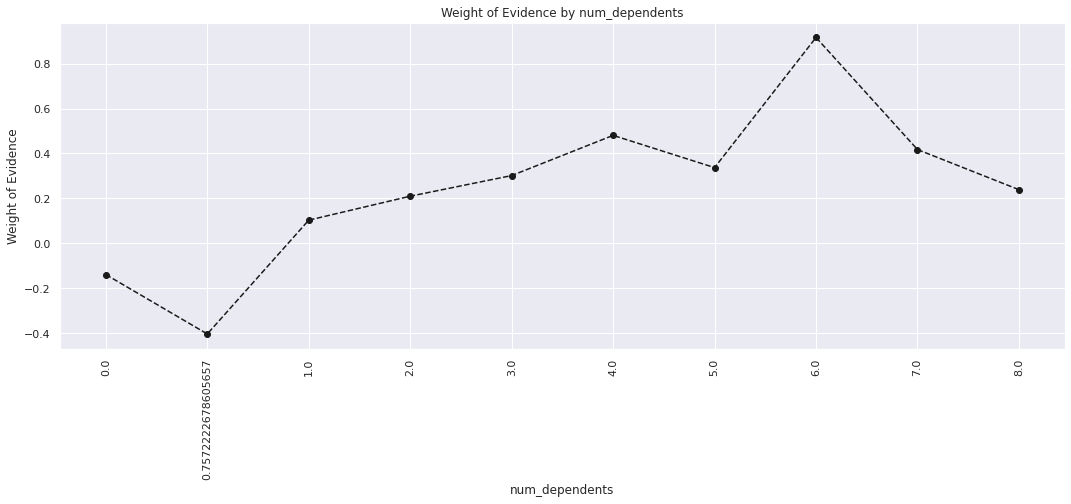

In [204]:
plot_by_woe(df_temp_2,90)

In [205]:
df_inputs_prepr['num_dependents:0'] = np.where(df_inputs_prepr['num_dependents']==0, 1, 0)
df_inputs_prepr['num_dependents:1'] = np.where(df_inputs_prepr['num_dependents']==1, 1, 0)
df_inputs_prepr['num_dependents:0.75722227'] = np.where((df_inputs_prepr['num_dependents']== 0.75722227),1,0)
df_inputs_prepr['num_dependents:2,3,4'] = np.where((df_inputs_prepr['num_dependents']== 2) & 
                                                        (df_inputs_prepr['num_dependents']==3) &
                                                        (df_inputs_prepr['num_dependents']== 4),1, 0)
df_inputs_prepr['num_dependents:6-13'] = np.where(df_inputs_prepr['num_dependents']>=6, 1, 0)

### Variable expense ratio

In [206]:
df_inputs_prepr['expense_ratio:0-0,1'] = np.where(df_inputs_prepr['expense_ratio']<=0.1, 1, 0)
df_inputs_prepr['expense_ratio:0,1-0,2'] = np.where((df_inputs_prepr['expense_ratio']>0.1) & 
                                                  (df_inputs_prepr['expense_ratio']<=0.2), 1, 0)
df_inputs_prepr['expense_ratio:0,2-0,3'] = np.where((df_inputs_prepr['expense_ratio']>0.2) & 
                                                  (df_inputs_prepr['expense_ratio']<=0.3), 1, 0)
df_inputs_prepr['expense_ratio:0,3-0,4'] = np.where((df_inputs_prepr['expense_ratio']>0.3) & 
                                                  (df_inputs_prepr['expense_ratio']<=0.4), 1, 0)
df_inputs_prepr['expense_ratio:0,4-0,5'] = np.where((df_inputs_prepr['expense_ratio']>0.4) & 
                                                  (df_inputs_prepr['expense_ratio']<=0.5), 1, 0)
df_inputs_prepr['expense_ratio:0,5-0,6'] = np.where((df_inputs_prepr['expense_ratio']>0.5) & 
                                                  (df_inputs_prepr['expense_ratio']<=0.6), 1, 0)
df_inputs_prepr['expense_ratio:0,6-0,7'] = np.where((df_inputs_prepr['expense_ratio']>0.6) & 
                                                  (df_inputs_prepr['expense_ratio']<=0.7), 1, 0)
df_inputs_prepr['expense_ratio:0,7-0,8'] = np.where((df_inputs_prepr['expense_ratio']>0.7) & 
                                                  (df_inputs_prepr['expense_ratio']<=0.8), 1, 0)
df_inputs_prepr['expense_ratio:0,8-0,9'] = np.where((df_inputs_prepr['expense_ratio']>0.8) & 
                                                  (df_inputs_prepr['expense_ratio']<=0.9), 1, 0)
df_inputs_prepr['expense_ratio:0,9-1'] = np.where((df_inputs_prepr['expense_ratio']>0.9) & 
                                                  (df_inputs_prepr['expense_ratio']<=1), 1, 0)
df_inputs_prepr['expense_ratio:1_and_higher'] = np.where((df_inputs_prepr['expense_ratio']>=1), 
                                                  1, 0)

In [207]:
df_temp = woe_discrete(df_inputs_prepr, 'expense_ratio', df_targets_prepr)
df_temp_2 = woe_continuous(df_inputs_prepr, 'expense_ratio', df_targets_prepr)
df_temp_2

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Variable personal_credit_%

In [208]:
df_inputs_prepr['personal_credit_%:0-0,1'] = np.where(df_inputs_prepr['personal_credit_%']<=0.1, 1, 0)
df_inputs_prepr['personal_credit_%:0,1-0,2'] = np.where((df_inputs_prepr['personal_credit_%']>0.1) & 
                                                  (df_inputs_prepr['personal_credit_%']<=0.2), 1, 0)
df_inputs_prepr['personal_credit_%:0,2-0,3'] = np.where((df_inputs_prepr['personal_credit_%']>0.2) & 
                                                  (df_inputs_prepr['personal_credit_%']<=0.3), 1, 0)
df_inputs_prepr['personal_credit_%:0,3-0,4'] = np.where((df_inputs_prepr['personal_credit_%']>0.3) & 
                                                  (df_inputs_prepr['personal_credit_%']<=0.4), 1, 0)
df_inputs_prepr['personal_credit_%:0,4-0,5'] = np.where((df_inputs_prepr['personal_credit_%']>0.4) & 
                                                  (df_inputs_prepr['personal_credit_%']<=0.5), 1, 0)
df_inputs_prepr['personal_credit_%:0,5-0,6'] = np.where((df_inputs_prepr['personal_credit_%']>0.5) & 
                                                  (df_inputs_prepr['personal_credit_%']<=0.6), 1, 0)
df_inputs_prepr['personal_credit_%:0,6-0,7'] = np.where((df_inputs_prepr['personal_credit_%']>0.6) & 
                                                  (df_inputs_prepr['personal_credit_%']<=0.7), 1, 0)
df_inputs_prepr['personal_credit_%:0,7-0,8'] = np.where((df_inputs_prepr['personal_credit_%']>0.7) & 
                                                  (df_inputs_prepr['personal_credit_%']<=0.8), 1, 0)
df_inputs_prepr['personal_credit_%:0,8-0,9'] = np.where((df_inputs_prepr['personal_credit_%']>0.8) & 
                                                  (df_inputs_prepr['personal_credit_%']<=0.9), 1, 0)
df_inputs_prepr['personal_credit_%:0,9-1'] = np.where((df_inputs_prepr['personal_credit_%']>0.9) & 
                                                  (df_inputs_prepr['personal_credit_%']<=1), 1, 0)
df_inputs_prepr['personal_credit_%:1_and_higher'] = np.where((df_inputs_prepr['personal_credit_%']>=1), 
                                                  1, 0)

### Variable num_home_loans

In [209]:
df_temp = woe_discrete(df_inputs_prepr, 'num_home_loans', df_targets_prepr)
df_temp_2 = woe_continuous(df_inputs_prepr, 'num_home_loans', df_targets_prepr)
df_temp_2

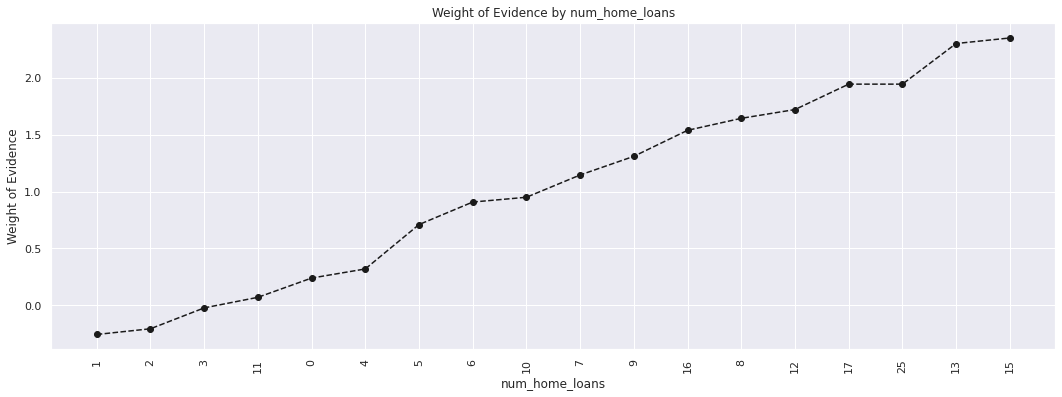

In [103]:
plot_by_woe(df_temp,90)

In [210]:
df_inputs_prepr['num_home_loans:1,2,3'] = np.where((df_inputs_prepr['num_home_loans']== 1) & 
                                                (df_inputs_prepr['num_home_loans']==2) &
                                                  (df_inputs_prepr['num_home_loans']== 3),1, 0)

df_inputs_prepr['num_home_loans:11,0,4'] = np.where((df_inputs_prepr['num_home_loans']== 11) & 
                                                (df_inputs_prepr['num_home_loans']==0) &
                                                  (df_inputs_prepr['num_home_loans']== 4),1, 0)


df_inputs_prepr['num_home_loans:5,6,10'] = np.where((df_inputs_prepr['num_home_loans']== 5) & 
                                                (df_inputs_prepr['num_home_loans']==6) &
                                                  (df_inputs_prepr['num_home_loans']== 10),1, 0)

df_inputs_prepr['num_home_loans:7,9'] = np.where((df_inputs_prepr['num_home_loans']== 7) & 
                                                (df_inputs_prepr['num_home_loans']==9),1, 0)
df_inputs_prepr['num_home_loans:13_high'] = np.where(df_inputs_prepr['num_home_loans']>=13,1, 0)


#PD MODEL

Splitting the data



In [216]:
from sklearn.model_selection import train_test_split

In [217]:
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_inputs_prepr ,df_targets_prepr, test_size = 0.2, random_state = 42,stratify=df_targets_prepr)

In [218]:
df_X_train.columns

Index(['personal_credit_%', 'age', 'A30-60_Counter', 'expense_ratio', 'income',
       'num_loans', 'A90+_Counter', 'num_home_loans', 'A60-90_Counter',
       'num_dependents', 'age:21-54', 'age:55-67', 'age:68-94', 'num_loans:0',
       'num_loans:1', 'num_loans:2', 'num_loans:3', 'num_loans:4-7',
       'num_loans:8', 'num_loans:9-13', 'num_loans:14-25', 'num_loans:25',
       'num_loans:26-27', 'num_loans:28-58', 'A30-60_Counter:0',
       'A30-60_Counter:1', 'A30-60_Counter:9,2', 'A30-60_Counter:8,3',
       'A30-60_Counter:4,5,7', 'A30-60_Counter:12,6,98',
       'A30-60_Counter:10,96', 'income>median', 'income==median',
       'income<median', 'A60-90_Counter:0', 'A60-90_Counter:1',
       'A60-90_Counter:7,8,2,98,3,4', 'A60-90_Counter:4,5,6,96',
       'A60-90_Counter:9,11', 'num_dependents:0', 'num_dependents:1',
       'num_dependents:0.75722227', 'num_dependents:2,3,4',
       'num_dependents:6-13', 'expense_ratio:0-0,1', 'expense_ratio:0,1-0,2',
       'expense_ratio:0,2-0,3

In [219]:
ref_category = ['age:21-54','num_loans:0','A30-60_Counter:0','income==median','A60-90_Counter:0','num_dependents:0','expense_ratio:0-0,1','personal_credit_%:0-0,1','num_home_loans:13_high']

In [220]:
inputs_train_with_ref_cat = df_X_train.loc[: , 
['age:21-54',
'age:55-67',
'age:68-94',
'num_loans:0',
'num_loans:1',
'num_loans:2',
'num_loans:3',
'num_loans:4-7',
'num_loans:8',
'num_loans:9-13',
'num_loans:14-25',
'num_loans:25',
'num_loans:26-27',
'num_loans:28-58',
'A30-60_Counter:0',
'A30-60_Counter:1',
'A30-60_Counter:9,2',
'A30-60_Counter:8,3',
'A30-60_Counter:4,5,7',
'A30-60_Counter:12,6,98',
'A30-60_Counter:10,96',
'income>median',
'income==median',
'A60-90_Counter:0',
'A60-90_Counter:1',
'A60-90_Counter:7,8,2,98,3,4',
'A60-90_Counter:4,5,6,96',
'A60-90_Counter:9,11',
'num_dependents:0',
'num_dependents:1',
'num_dependents:0.75722227',
'num_dependents:2,3,4',
'num_dependents:6-13',
'expense_ratio:0-0,1',
'expense_ratio:0,1-0,2',
'expense_ratio:0,2-0,3',
'expense_ratio:0,3-0,4',
'expense_ratio:0,4-0,5',
'expense_ratio:0,5-0,6',
'expense_ratio:0,6-0,7',
'expense_ratio:0,7-0,8',
'expense_ratio:0,8-0,9',
'expense_ratio:0,9-1',
'expense_ratio:1_and_higher',
'personal_credit_%:0-0,1',
'personal_credit_%:0,1-0,2',
'personal_credit_%:0,2-0,3',
'personal_credit_%:0,3-0,4',
'personal_credit_%:0,4-0,5',
'personal_credit_%:0,5-0,6',
'personal_credit_%:0,6-0,7',
'personal_credit_%:0,7-0,8',
'personal_credit_%:0,8-0,9',
'personal_credit_%:0,9-1',
'personal_credit_%:1_and_higher',
'income<median',
'num_home_loans:1,2,3',
'num_home_loans:11,0,4',
'num_home_loans:5,6,10',
'num_home_loans:7,9',
'num_home_loans:13_high',
 ]]

In [221]:
inputs_train = inputs_train_with_ref_cat.drop(ref_category, axis = 1)

In [231]:
## for test dataset
inputs_test_with_ref_cat_x = df_X_test.loc[: , 
['age:21-54',
'age:55-67',
'age:68-94',
'num_loans:0',
'num_loans:1',
'num_loans:2',
'num_loans:3',
'num_loans:4-7',
'num_loans:8',
'num_loans:9-13',
'num_loans:14-25',
'num_loans:25',
'num_loans:26-27',
'num_loans:28-58',
'A30-60_Counter:0',
'A30-60_Counter:1',
'A30-60_Counter:9,2',
'A30-60_Counter:8,3',
'A30-60_Counter:4,5,7',
'A30-60_Counter:12,6,98',
'A30-60_Counter:10,96',
'income>median',
'income==median',
'A60-90_Counter:0',
'A60-90_Counter:1',
'A60-90_Counter:7,8,2,98,3,4',
'A60-90_Counter:4,5,6,96',
'A60-90_Counter:9,11',
'num_dependents:0',
'num_dependents:1',
'num_dependents:0.75722227',
'num_dependents:2,3,4',
'num_dependents:6-13',
'expense_ratio:0-0,1',
'expense_ratio:0,1-0,2',
'expense_ratio:0,2-0,3',
'expense_ratio:0,3-0,4',
'expense_ratio:0,4-0,5',
'expense_ratio:0,5-0,6',
'expense_ratio:0,6-0,7',
'expense_ratio:0,7-0,8',
'expense_ratio:0,8-0,9',
'expense_ratio:0,9-1',
'expense_ratio:1_and_higher',
'personal_credit_%:0-0,1',
'personal_credit_%:0,1-0,2',
'personal_credit_%:0,2-0,3',
'personal_credit_%:0,3-0,4',
'personal_credit_%:0,4-0,5',
'personal_credit_%:0,5-0,6',
'personal_credit_%:0,6-0,7',
'personal_credit_%:0,7-0,8',
'personal_credit_%:0,8-0,9',
'personal_credit_%:0,9-1',
'personal_credit_%:1_and_higher',
'income<median',
'num_home_loans:1,2,3',
'num_home_loans:11,0,4',
'num_home_loans:5,6,10',
'num_home_loans:7,9',
'num_home_loans:13_high',
 ]]

In [233]:
inputs_test_X = inputs_test_with_ref_cat_x.drop(ref_category, axis = 1)

#PD_Logistic Regression

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
reg = LogisticRegression()
pd.options.display.max_rows = None
reg.fit(inputs_train, df_y_train)

LogisticRegression()

In [224]:
reg.intercept_

array([-2.30751372])

In [225]:
reg.coef_

array([[-0.4087995 , -0.78357026, -0.50942815, -0.69114446, -0.63695225,
        -0.62902359, -0.78558179, -0.42648367, -0.10666804,  0.13124195,
         0.21265888,  0.18802763,  0.6123448 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -1.2994566 ,  1.37474972,
         0.        ,  0.        ,  0.        ,  0.08396106,  0.        ,
         0.        ,  0.52410425, -0.00939042, -0.13867951, -0.07645507,
        -0.0778964 ,  0.11251901,  0.11920413,  0.2874516 ,  0.31090945,
         0.29752775,  0.10155036,  0.2619638 ,  0.42269522,  0.83587528,
         0.98993679,  1.31320945,  1.47696764,  1.79204973,  1.96587143,
         2.17004368,  2.99582941, -0.99639157,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [226]:
feature_name = inputs_train.columns.values

In [227]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-2.307514
1,age:55-67,-0.408799
2,age:68-94,-0.783570
3,num_loans:1,-0.509428
4,num_loans:2,-0.691144
5,num_loans:3,-0.636952
6,num_loans:4-7,-0.629024
7,num_loans:8,-0.785582
8,num_loans:9-13,-0.426484
9,num_loans:14-25,-0.106668


In [237]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
prediction_reg = reg.predict(inputs_test_X)
acc_test = accuracy_score(prediction_reg, df_y_test)
print('Test set accuracy of Logistic_regression: {:.2f}'.format(acc_test))
print(classification_report(df_y_test,prediction_reg))
print(confusion_matrix(df_y_test,prediction_reg))

Test set accuracy of Logistic_regression: 0.93
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     27995
           1       0.43      0.05      0.10      2005

    accuracy                           0.93     30000
   macro avg       0.68      0.52      0.53     30000
weighted avg       0.90      0.93      0.91     30000

[[27850   145]
 [ 1895   110]]
